# Financial Sentiment Analysis_RNN Model

The following data is intended for advancing financial sentiment analysis research. It's two datasets (FiQA, Financial PhraseBank) combined into one easy-to-use CSV file. It provides financial sentences with sentiment labels.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,LSTM,SimpleRNN,Dropout,BatchNormalization,Activation,Embedding,GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix,classification_report


In [86]:
data= pd.read_csv(r"C:\Users\dtdee\OneDrive\Desktop\Letsupgrade_Python\Machine_Learning\Deep_Learning\RNN Model\Financial_sentiment_analysis_RNN.csv")

In [87]:
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [88]:
data['Sentence'][0]

"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [90]:
X = data['Sentence']

Y = data['Sentiment']

In [91]:
# Splitting the data now.

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [92]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4673,), (1169,), (4673,), (1169,))

In [93]:
# creating word tokens now to feed it into model

token =Tokenizer(num_words=100,lower=True)

token.fit_on_texts(X_train)
token.fit_on_texts(X_test)

X_train= token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)


In [94]:
# Several List is generated with different lengths

print(X_train[0:5])

print()

print(type(X_train))

[[5, 35, 1, 2], [4, 10, 3, 11, 4, 53], [3, 1, 44, 2, 41, 28, 22, 60, 2, 1, 47, 10, 87, 28, 22], [19, 41, 26, 5, 61, 27, 74, 35, 30, 13, 6, 87, 2, 5, 2, 16, 47], [18, 53]]

<class 'list'>


In [95]:
# Checking the index values of all the words in our vocab

print(token.word_index)

print()

print(token.index_word)

{'the': 1, 'of': 2, 'in': 3, 'to': 4, 'and': 5, 'a': 6, 'for': 7, 'eur': 8, 'from': 9, "'s": 10, 'is': 11, 'on': 12, 'will': 13, 'company': 14, 'mn': 15, 'its': 16, 'as': 17, 'by': 18, '1': 19, 'with': 20, 'profit': 21, 'sales': 22, 'has': 23, 'be': 24, 'at': 25, 'finnish': 26, 'said': 27, 'net': 28, 'million': 29, 'it': 30, 'year': 31, '2': 32, '3': 33, '5': 34, 'that': 35, 'was': 36, 'm': 37, 'operating': 38, '4': 39, '0': 40, '2009': 41, 'mln': 42, '2008': 43, 'quarter': 44, 'finland': 45, 'period': 46, 'group': 47, '6': 48, '2007': 49, 'an': 50, 'are': 51, 'co': 52, '7': 53, 'share': 54, '8': 55, 'up': 56, '9': 57, 'new': 58, '2010': 59, 'business': 60, 'oyj': 61, 'first': 62, 'this': 63, 'market': 64, '000': 65, 'shares': 66, 'loss': 67, 'down': 68, 'have': 69, 'which': 70, 'also': 71, 'compared': 72, '2006': 73, 'today': 74, 'services': 75, 'euro': 76, "''": 77, 'helsinki': 78, '10': 79, 'been': 80, 'corresponding': 81, 'about': 82, 'per': 83, 'percent': 84, 'operations': 85, 't'

In [96]:
# Checking no of times these words are occuring in our Vocab

token.word_counts

OrderedDict([('all', 102),
             ('amer', 13),
             ('sports', 31),
             ('companies', 106),
             ('develop', 14),
             ('and', 2520),
             ('manufacture', 16),
             ('technically', 2),
             ('advanced', 9),
             ('products', 124),
             ('that', 417),
             ('improve', 20),
             ('the', 6101),
             ('performance', 36),
             ('of', 3330),
             ('active', 10),
             ('participants', 9),
             ('due', 54),
             ('to', 2801),
             ('pirkka', 2),
             ('beer', 29),
             ('olvi', 15),
             ("'s", 948),
             ('brewery', 8),
             ('in', 3146),
             ('iisalmi', 1),
             ('is', 909),
             ('moving', 11),
             ('7', 292),
             ('day', 70),
             ('24', 37),
             ('hour', 4),
             ('work', 29),
             ('shifts', 4),
             ('second', 109),

In [97]:
# Checking how many sentences in our Vocab
print('No of sentences in our Vocab::',token.document_count)

print()

#Checking how many unique words present in our Vocab
print('No of unique words present in our Vocab::',len(token.word_index))

No of sentences in our Vocab:: 5842

No of unique words present in our Vocab:: 11543


In [98]:
# Now we will pad our each sentences in order to bring them into same length.

X_train = pad_sequences(X_train,padding='post',maxlen=40)
X_test = pad_sequences(X_test,padding='post',maxlen=40)

In [99]:
print(X_train[0:3])

print()
print()

print(X_test[0:3])


[[ 5 35  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4 10  3 11  4 53  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  1 44  2 41 28 22 60  2  1 47 10 87 28 22  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


[[ 5 13 17  5  2  1 60  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3 45  1  2 23 27 30 13 96  4  5  7  1 35  3 43  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16 11 79 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [100]:
# We would like to reshape our X data into as specifiic shape as RNN would onlu accept that

X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [101]:
print(X_train.shape)

print(X_test.shape)

(4673, 40, 1)
(1169, 40, 1)


In [102]:
# Now we wil also have to labelencode all the target variables

encode= LabelEncoder()

y_train= encode.fit_transform(y_train)
y_test= encode.fit_transform(y_test)

In [103]:
# 1-->'neutral' ,, 0-->'negative' , 2-->'positive'
print(y_train[0:10])
print(encode.inverse_transform(y_train[0:10]))

print()
print()



# 0-->'negative' , 1-->'neutral' , 2-->'positive'
print(y_test[0:7])
print(encode.inverse_transform(y_test[0:7]))


[1 1 1 0 2 1 1 2 2 2]
['neutral' 'neutral' 'neutral' 'negative' 'positive' 'neutral' 'neutral'
 'positive' 'positive' 'positive']


[1 0 1 0 0 1 1]
['neutral' 'negative' 'neutral' 'negative' 'negative' 'neutral' 'neutral']


In [104]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2]
[0 1 2]


In [105]:
y_train=np.expand_dims(y_train,-1)

In [106]:
y_train=np.expand_dims(y_train,-1)

In [107]:
y_train.shape

(4673, 1, 1)

# Now we will build the RNN Architecture

In [119]:
model= Sequential()

model.add(Embedding(11543,output_dim=5,input_length=40))

model.add(SimpleRNN(units=128,return_sequences=False))

# model.add(GRU(units=256,return_sequences=False))

model.add(Dense(units=128,activation='relu'))
# keras.layers.BatchNormalization()

model.add(Dense(units=256,activation='relu'))
keras.layers.Dropout(rate=0.1)

model.add(Dense(units=512,activation='relu'))
keras.layers.Dropout(rate=0.1)


model.add(Dense(units=3,activation='softmax'))

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 40, 5)             57715     
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 128)               17152     
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 256)               33024     
                                                                 
 dense_18 (Dense)            (None, 512)               131584    
                                                                 
 dense_19 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 257526 (1005.96 KB)
Trainable params: 25

In [120]:
#Compiling the model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [121]:
model.fit(X_train,y_train,epochs=20,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/20
47/47 [==============================] - 5s 39ms/step - loss: 0.9493 - accuracy: 0.5592 - val_loss: 0.9755 - val_accuracy: 0.5056
Epoch 2/20
47/47 [==============================] - 1s 27ms/step - loss: 0.9113 - accuracy: 0.5973 - val_loss: 0.9152 - val_accuracy: 0.5808
Epoch 3/20
47/47 [==============================] - 1s 29ms/step - loss: 0.8896 - accuracy: 0.6131 - val_loss: 0.9121 - val_accuracy: 0.5954
Epoch 4/20
47/47 [==============================] - 1s 27ms/step - loss: 0.8876 - accuracy: 0.6039 - val_loss: 0.9216 - val_accuracy: 0.5817
Epoch 5/20
47/47 [==============================] - 1s 32ms/step - loss: 0.8720 - accuracy: 0.6169 - val_loss: 0.9267 - val_accuracy: 0.5945
Epoch 6/20
47/47 [==============================] - 2s 34ms/step - loss: 0.8731 - accuracy: 0.6208 - val_loss: 0.9178 - val_accuracy: 0.5868
Epoch 7/20
47/47 [==============================] - 2s 32ms/step - loss: 0.8778 - accuracy: 0.6187 - val_loss: 0.9180 - val_accuracy: 0.5877
Epoch 8/20
47

In [122]:
y_pred=model.predict((X_test)).round()
y_pred

37/37 [==============================] - 1s 7ms/step


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [123]:
print(np.argmax(y_pred[0]))


print(y_test[0])

1
1


In [124]:
print(np.argmax(y_pred[1110]))


print(y_test[1110])

print()
print(model.evaluate(X_test,y_test))

0
1

37/37 [==============================] - 0s 9ms/step - loss: 0.9299 - accuracy: 0.6082
[0.9299190044403076, 0.6082121729850769]


In [125]:
class_labels = ['positive','negative','neutral']

y_pred_labels= [np.argmax(x) for x in y_pred]

y_test_labels = [x for x in y_test]

In [126]:
print(y_pred_labels[0:10])

print(y_test_labels[0:10])

[1, 1, 1, 0, 2, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 1, 1, 0, 1]


In [127]:
cm = confusion_matrix(y_pred_labels,y_test_labels)
cm

array([[ 39,  87,  66],
       [ 62, 456, 150],
       [ 59,  77, 173]], dtype=int64)

<Axes: >

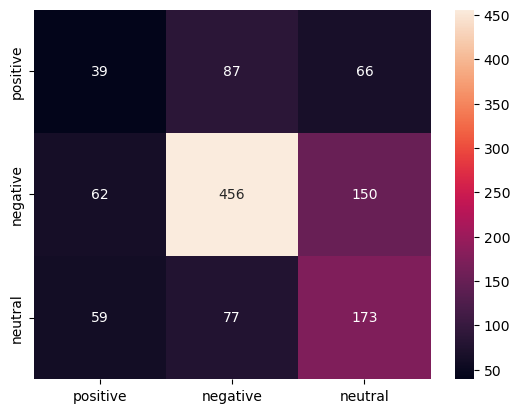

In [128]:
sns.heatmap(cm,fmt='d',annot=True,xticklabels=class_labels,yticklabels=class_labels)

In [129]:
print(classification_report(y_pred_labels,y_test_labels,target_names=class_labels))

              precision    recall  f1-score   support

    positive       0.24      0.20      0.22       192
    negative       0.74      0.68      0.71       668
     neutral       0.44      0.56      0.50       309

    accuracy                           0.57      1169
   macro avg       0.47      0.48      0.48      1169
weighted avg       0.58      0.57      0.57      1169

